# Decision Tree

In [ ]:
p6.4<-read.csv("https://raw.githubusercontent.com/LiShingHan/DataScience/main/DataSet/p6.4.csv")
p6.4

outlook,temp,humidity,windy,play
<chr>,<chr>,<chr>,<chr>,<chr>
sunny,hot,high,false,no
sunny,hot,high,true,no
overcast,hot,high,false,yes
rainy,warm,high,false,yes
rainy,cool,normal,false,yes
rainy,cool,normal,true,no
overcast,cool,normal,true,yes
sunny,warm,high,false,no
sunny,cool,normal,false,yes


In [ ]:
str(p6.4)

'data.frame':	14 obs. of  5 variables:
 $ outlook : chr  "sunny" "sunny" "overcast" "rainy" ...
 $ temp    : chr  "hot" "hot" "hot" "warm" ...
 $ humidity: chr  "high" "high" "high" "high" ...
 $ windy   : chr  "false" "true" "false" "false" ...
 $ play    : chr  "no" "no" "yes" "yes" ...


In [ ]:
install.packages('rpart')
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# rpart   ID3分類迴歸樹

In [ ]:
model <- rpart( play ~ outlook + temp + humidity + windy,  data = p6.4, 
               control = rpart.control(minsplit = 2))

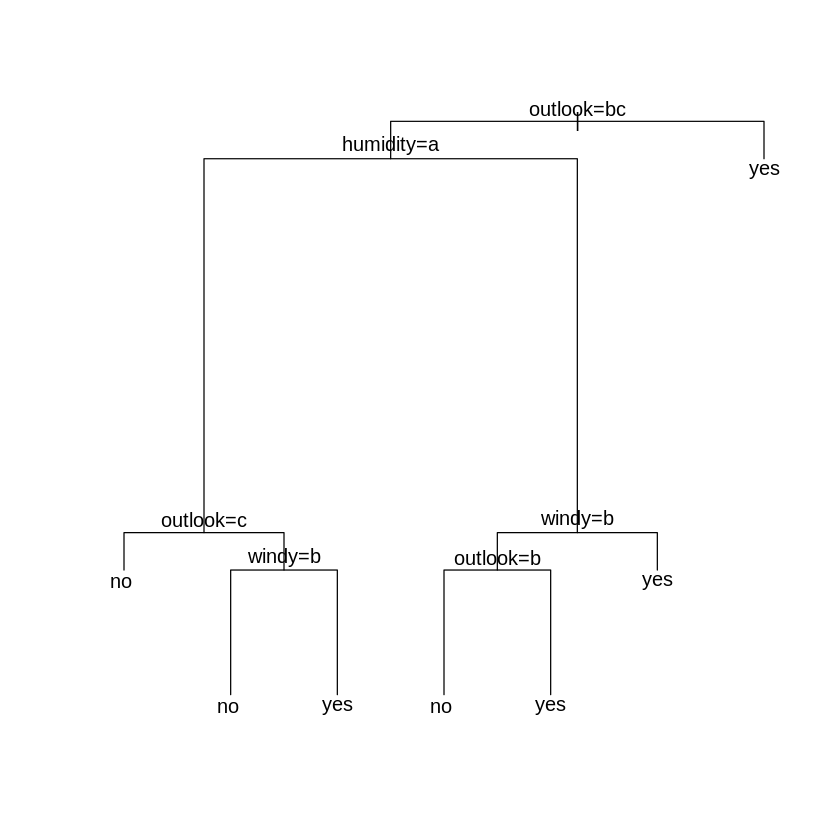

In [ ]:
plot(model)
text(model)

In [ ]:
test = data.frame(outlook='sunny', temp='hot', humidity='high', windy='false')

In [ ]:
pred <- predict(model, newdata=test, type="class")

In [ ]:
pred

1 
no 
Levels: no yes

# rpart  CART分類迴歸樹

In [ ]:
model.cart<-rpart(play ~ outlook + temp + humidity + windy,  data = p6.4, 
                  method="class", 
                  parms=list( split="gini" ) ) # 使用CART算法的時候, split = “gini”
model.cart

n= 14 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 14 5 yes (0.3571429 0.6428571) *

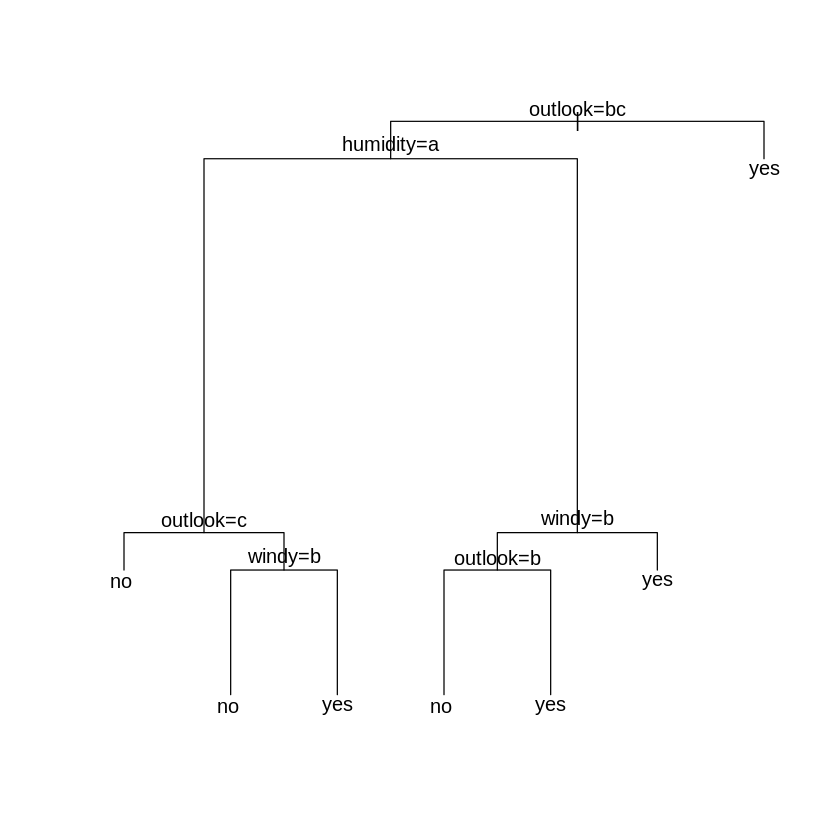

In [ ]:
plot(model)
text(model)

# Tree CART分類迴歸樹

In [ ]:
install.packages("tree")
library(tree)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
model <- tree( play ~ outlook + temp + humidity + windy,  data = p6.4 , control = tree.control(nobs = 14, mindev = 0.001, minsize = 2))

Warning message in tree(play ~ outlook + temp + humidity + windy, data = p6.4, control = tree.control(nobs = 14, :
“NAs introduced by coercion”
Warning message in tree(play ~ outlook + temp + humidity + windy, data = p6.4, control = tree.control(nobs = 14, :
“NAs introduced by coercion”


In [ ]:
model

node), split, n, deviance, yval
      * denotes terminal node

1) root 14 NA NA *

In [ ]:
plot(model)
text(model)

ERROR: ignored

# C4.5

### C4.5算法使用RWeka包，RWeka包的安装需要依赖于rJava包。

### rJava包的安装
### https://www.oracle.com/java/technologies/javase-jdk15-downloads.html



In [ ]:
install.packages('rJava')
library(rJava)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("RWeka")
library(RWeka)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RWekajars’




In [ ]:
install.packages('partykit')
library(partykit)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’


Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



In [ ]:
model.C45 <- J48( play ~ outlook + temp + humidity + windy, data = p6.4  ,
                                control = Weka_control(U = FALSE ,  M=1 , B = FALSE) )

#print(model.C45)

plot(model.C45) 

ERROR: ignored

# C5.0

In [ ]:
install.packages("C50")
library(C50)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’, ‘Cubist’




In [ ]:
model.c50 <- C5.0( play ~ outlook + temp + humidity + windy,  data = p6.4, rules=F)

ERROR: ignored

In [ ]:
plot( model.c50 )

ERROR: ignored

## 測試


### 1.	請使用決策樹建立模型myModel （使用 rpart）

In [2]:
install.packages('rpart')
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
myData<-read.csv("https://raw.githubusercontent.com/LiShingHan/DataScience/main/DataSet/p6.4.csv")
myModel <- rpart ( play ~ ., data = myData, control = rpart.control(minsplit = 2))

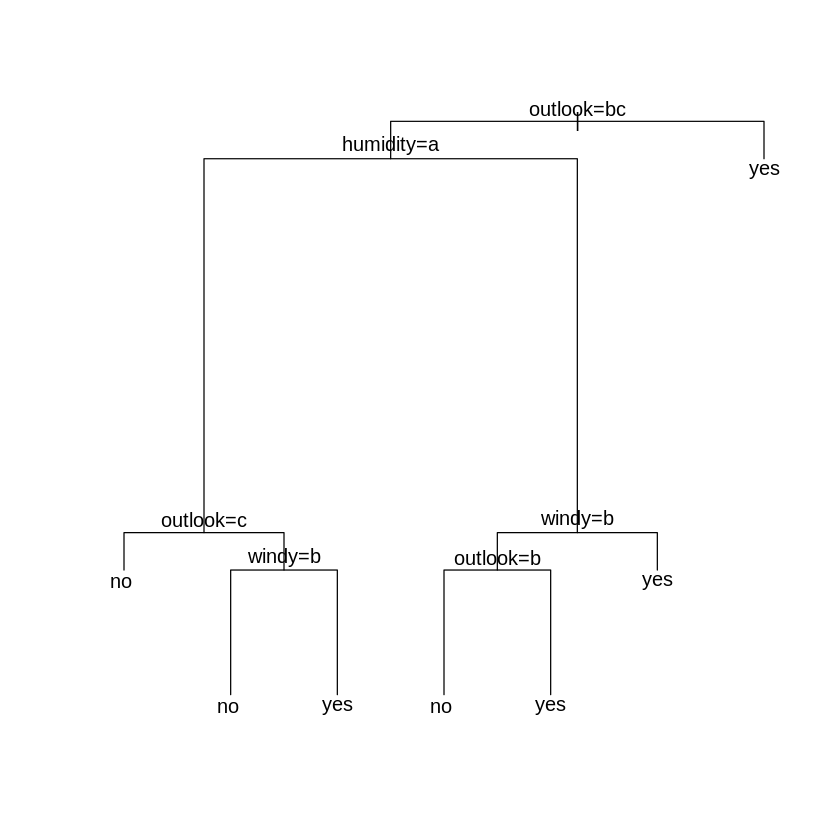

In [16]:
plot(myModel)
text(myModel)

### 2.	使用所建立的模型 myModel 來預測某測試資料 myTest 當天氣(晴朗) 、氣溫(熱) 、濕度(高) 、風(無)的情況下是否適合進行比賽，並將預測的結果儲存於 myPred

In [5]:
myTest <- data.frame(outlook = 'sunny', temp = 'hot', humidity = 'high', windy = 'false')
myPred <- predict ( myModel, newdata = myTest, type = "class")
myPred

[1] yes
Levels: no yes